In [86]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [87]:
%matplotlib inline

In [88]:
data = pd.read_csv('train.csv')

In [89]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
data.shape

(1460, 81)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Посмотрим на распределение output 

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

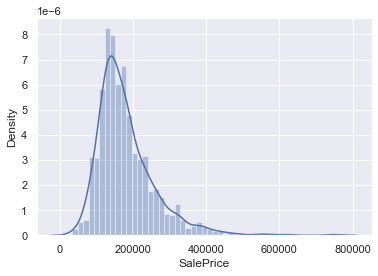

In [92]:
sns.set()
sns.distplot(data.SalePrice)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

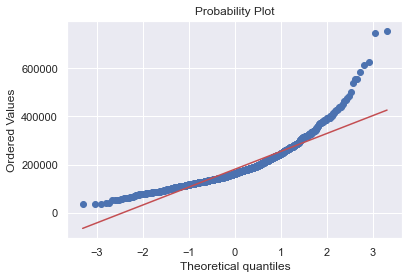

In [93]:
from scipy import stats
stats.probplot(x = data.SalePrice, plot=sns.mpl.pyplot)

Распределение близко к нормальному. Но заметна ассиметричность и легкая вытянутость графика. Посмотрим на значения skewness и kurtosis

In [94]:
print(f'Коэффициент ассиметрии {data.SalePrice.skew()}')
print(f'Коэффициент эксцесса {data.SalePrice.kurt()}')

Коэффициент ассиметрии 1.8828757597682129
Коэффициент эксцесса 6.536281860064529


Коэффициенты говорят о значимость отклонения. Поэтому применим log-трансформацию. 

In [95]:
data.SalePrice = np.log1p(data.SalePrice)

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

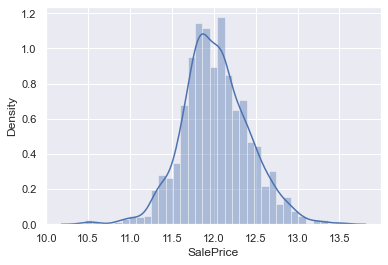

In [96]:
sns.set()
sns.distplot(data.SalePrice)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

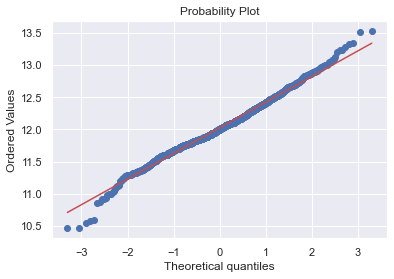

In [97]:
stats.probplot(x = data.SalePrice, plot=sns.mpl.pyplot)

In [98]:
print(f'Коэффициент ассиметрии {data.SalePrice.skew()}')
print(f'Коэффициент эксцесса {data.SalePrice.kurt()}')

Коэффициент ассиметрии 0.12134661989685329
Коэффициент эксцесса 0.809519155707878


Теперь посмотрим на inputs и их корреляцию. Построим тепловую карту   

<AxesSubplot:>

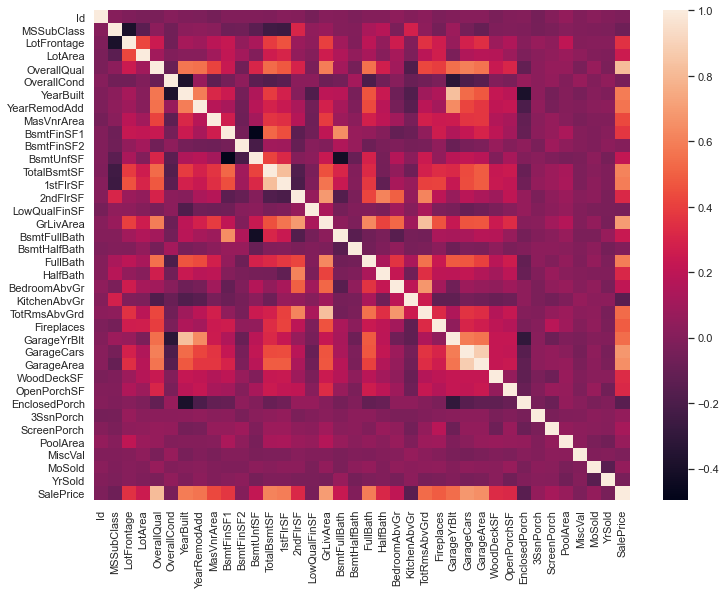

In [99]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(data.corr())

Выберем 15 переменных, который больше всего коррелируют с откликом и построим для них увеличенную тепловую карту. 

<AxesSubplot:>

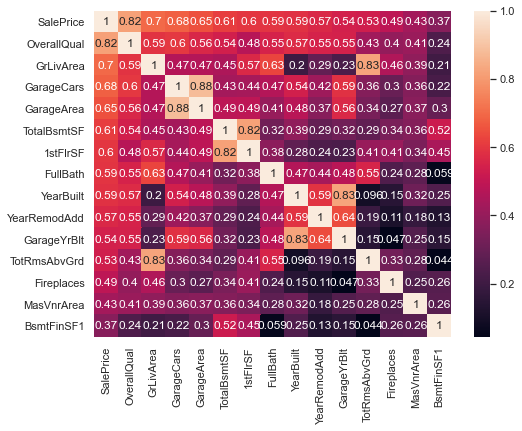

In [100]:
f, ax = plt.subplots(figsize=(8, 6)) 
y = data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
sns.heatmap(data[y].corr(), annot=True)

На тепловой карте хорошо выделяются четыре пары положительно коррелирующих переменных. 'GarageCars' и 'GarageArea'. '1stFlrSF'(Площадь первого этажа в квадратных футах) и 'TotalBsmtSF'(Общая площадь подвала в квадратных футах). 'YearBuilt' и 'GarageYrBlt'. 'GrLivArea' (Площадь над уровнем земли) и 'TotRmsAbvGrd'(Количество комнат над уровнем земли). Корреляция между ними очень логична. Вернемся к этому позже. 


## Выбросы

Посмотрим, есть ли выбросы в наших данных. Для этого построим графики зависимости отклика с самыми коррелируемыми переменными. 

In [101]:
categorialdata = data.dtypes[data.dtypes == object].index
numericaldata = list(data.dtypes[data.dtypes != 'object'].index)
numericaldata.remove('SalePrice') 

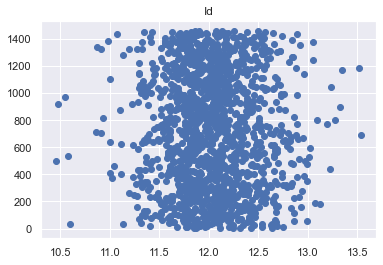

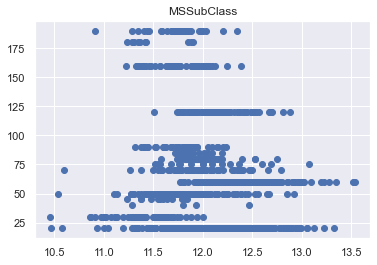

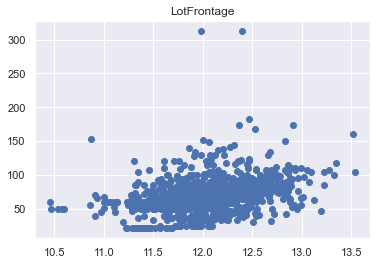

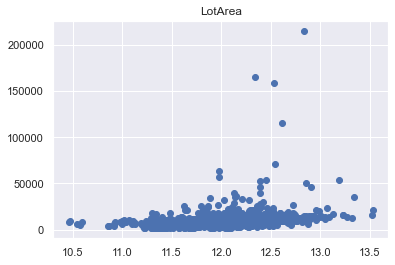

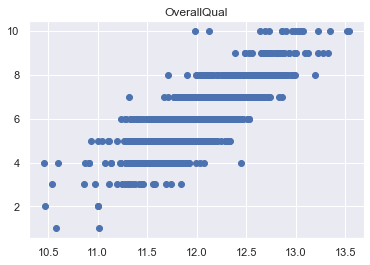

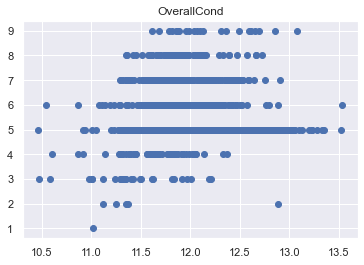

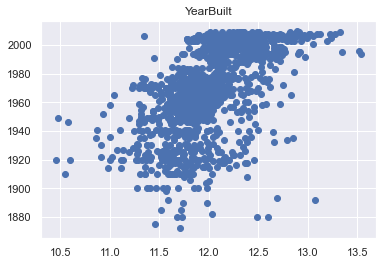

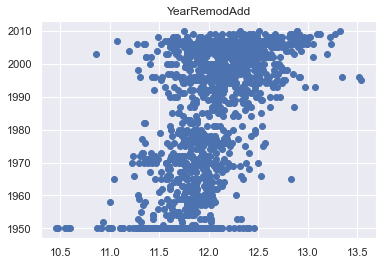

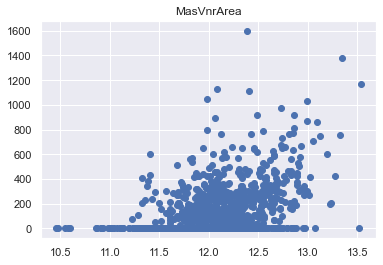

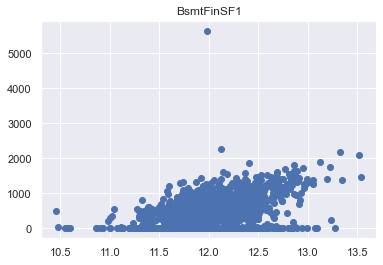

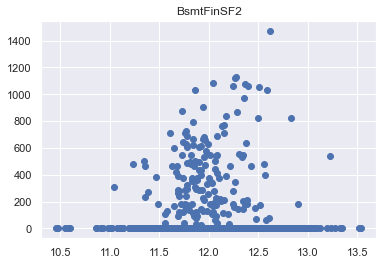

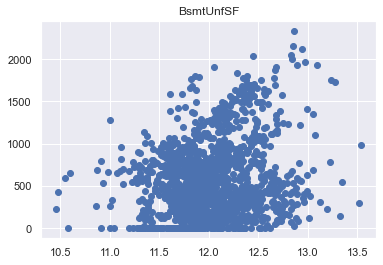

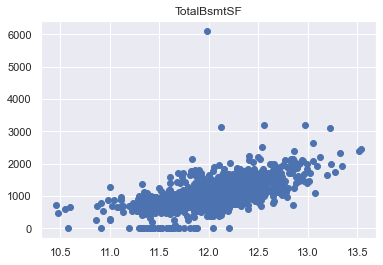

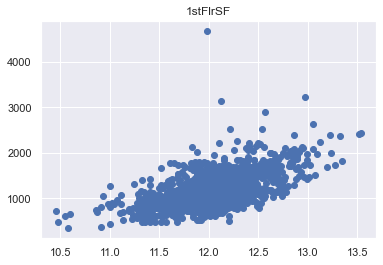

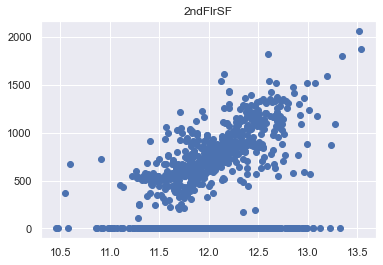

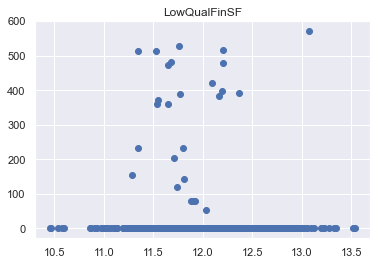

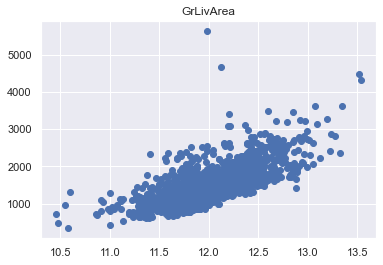

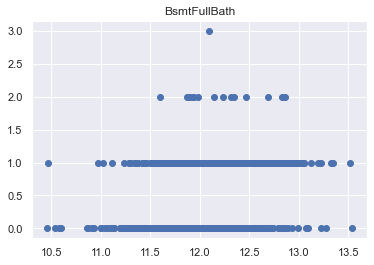

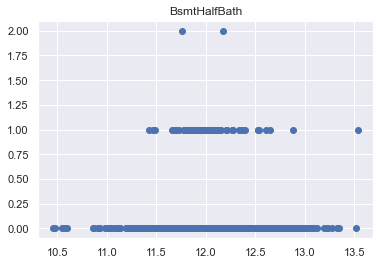

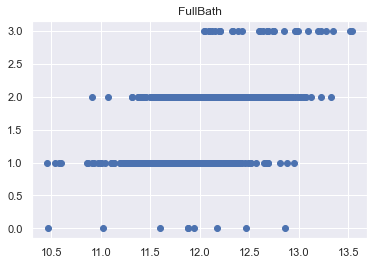

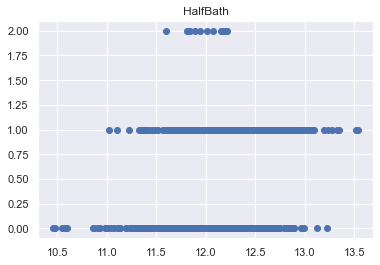

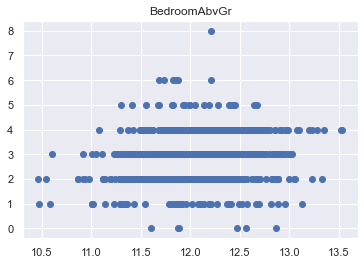

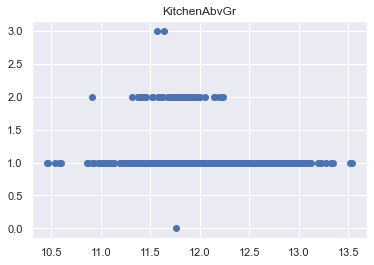

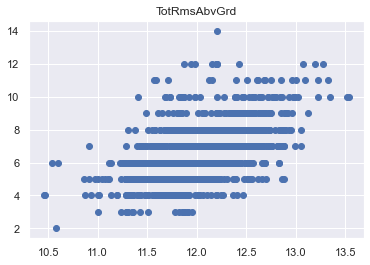

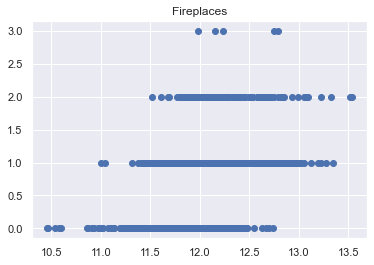

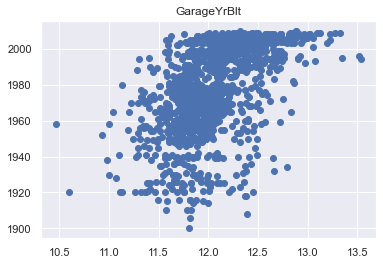

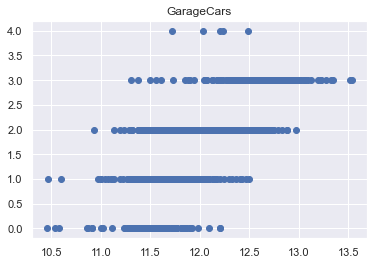

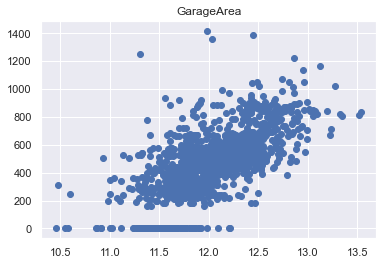

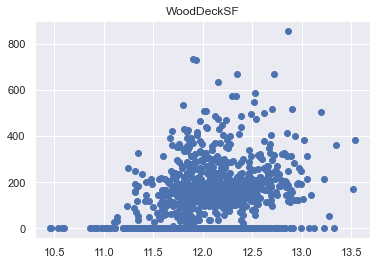

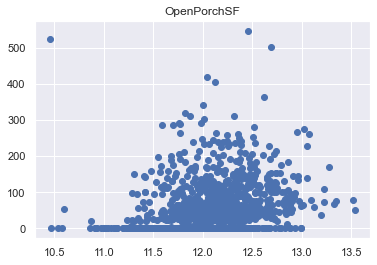

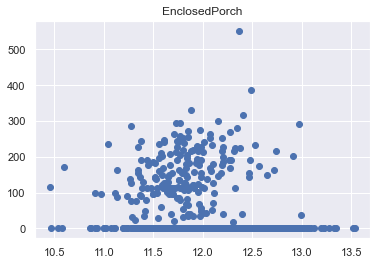

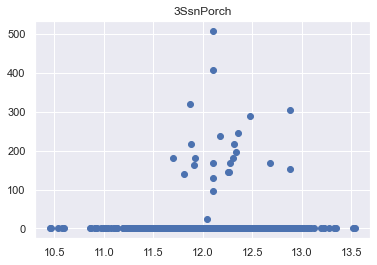

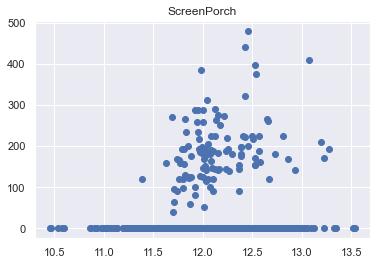

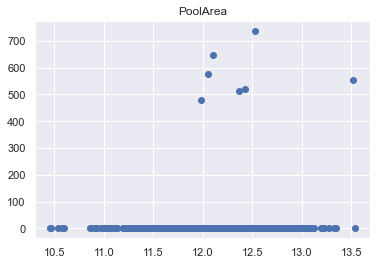

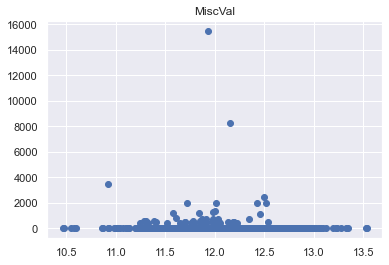

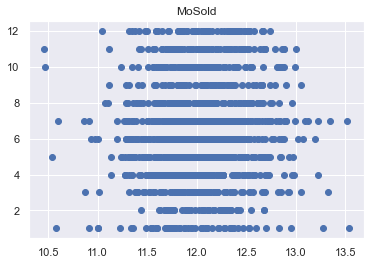

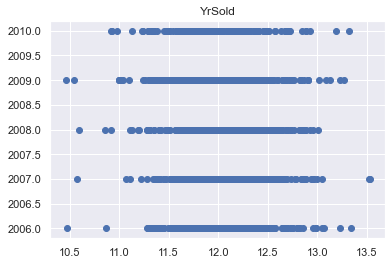

In [102]:
for x in data[numericaldata].columns:
    fig, ax = plt.subplots()
    ax.scatter(data.SalePrice, data[x])
    plt.title(x)
    plt.show()

In [103]:
watchdata = y

На некоторых графиках явно есть выбросы, которые выбиваются из общей зависимоси. Посмотрим на эти строчки. 

In [109]:
data = data[data.GrLivArea < 4000]
data = data[data.MiscVal < 14000]
data = data[data.LotFrontage < 250]
data = data[data.LotArea < 200000]

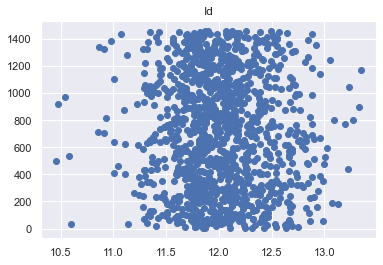

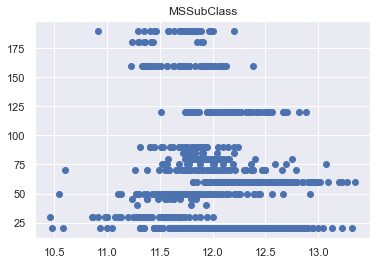

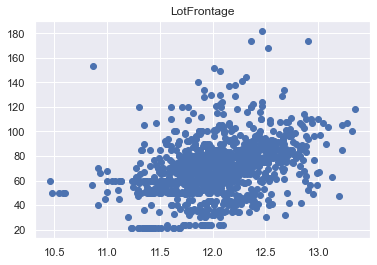

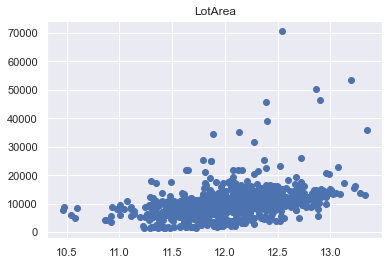

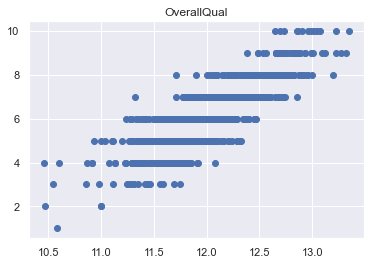

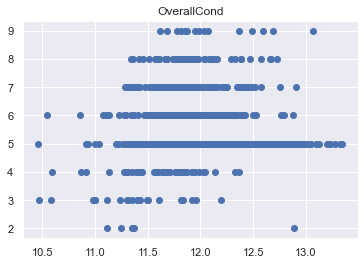

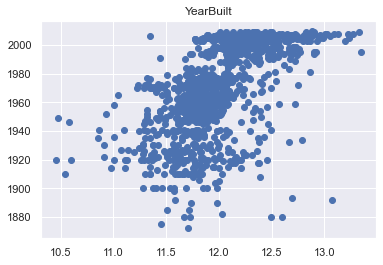

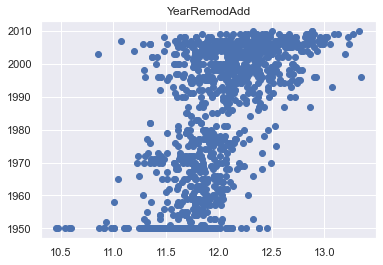

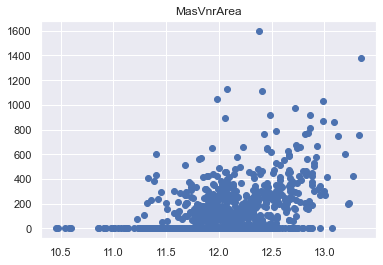

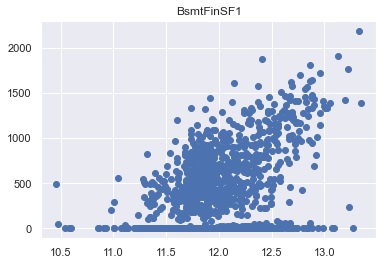

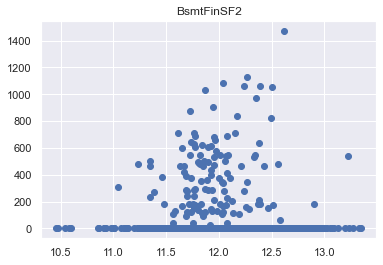

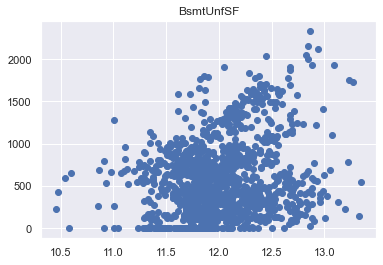

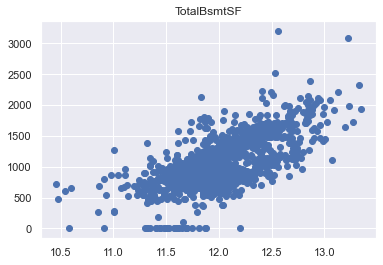

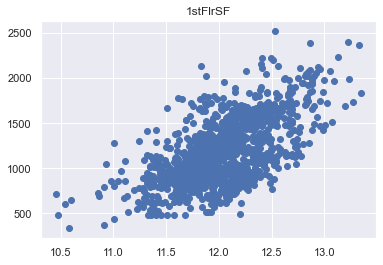

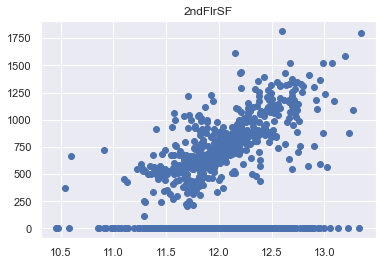

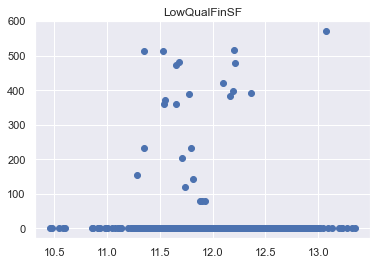

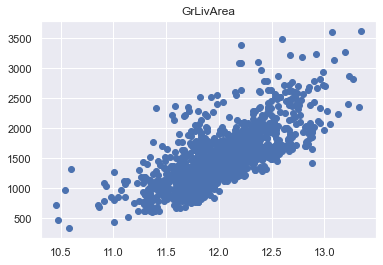

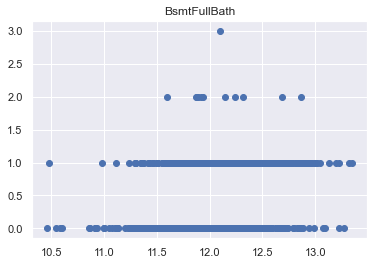

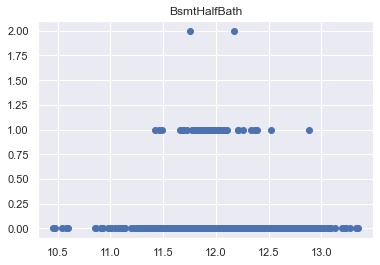

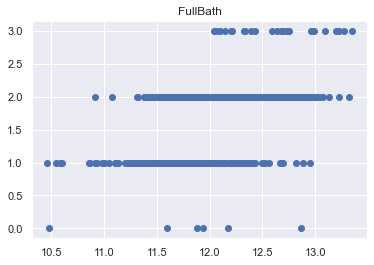

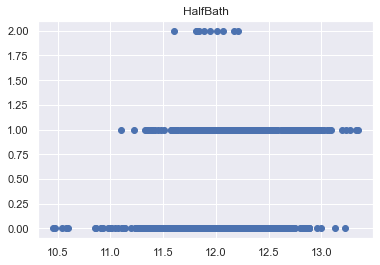

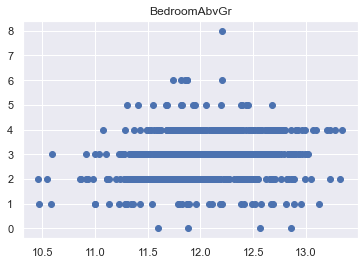

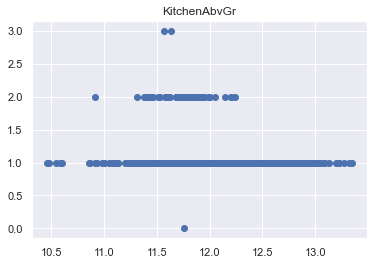

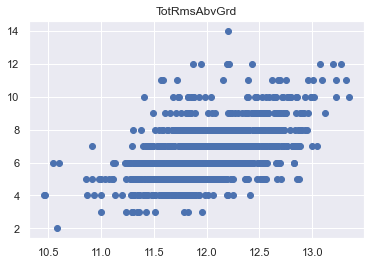

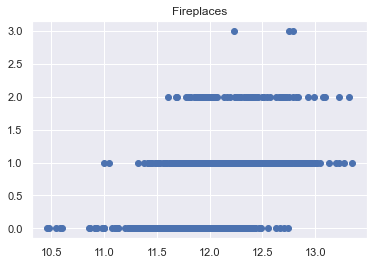

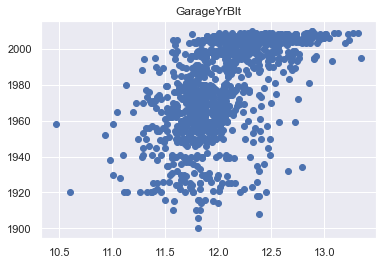

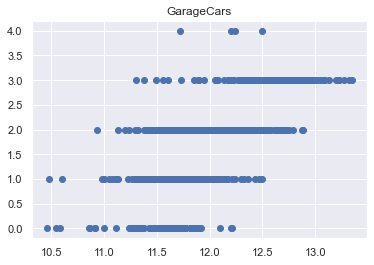

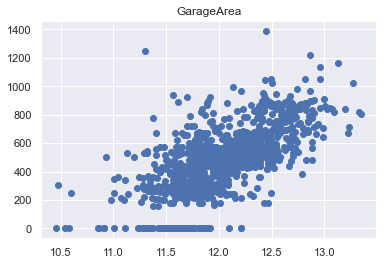

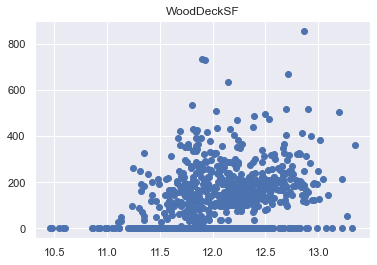

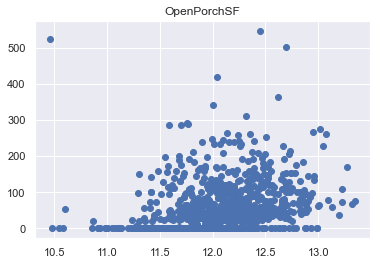

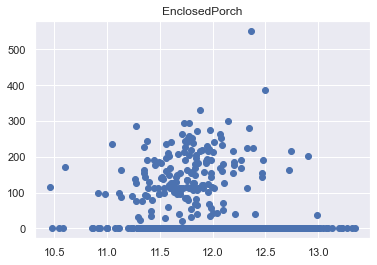

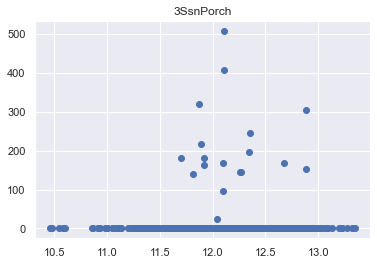

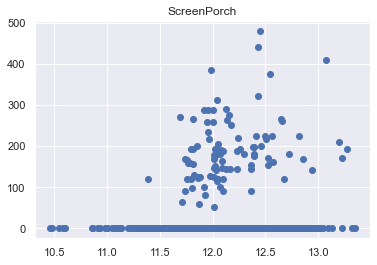

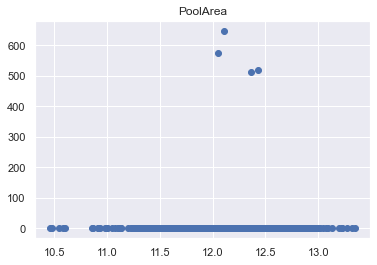

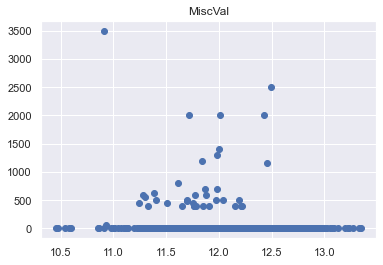

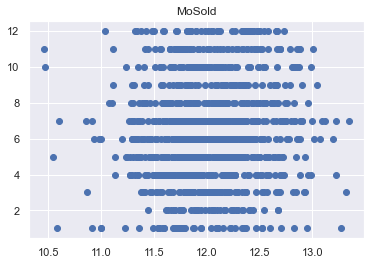

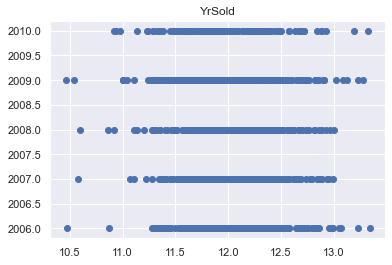

In [110]:
for x in data[numericaldata].columns:
    fig, ax = plt.subplots()
    ax.scatter(data.SalePrice, data[x])
    plt.title(x)
    plt.show()

In [112]:
data.shape

(1195, 81)

Эти дома имеют слишком маленькую стоимость для такой большой площади. Выбросим строчки с ними. 

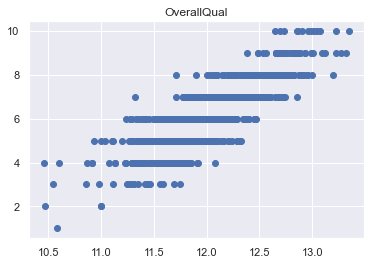

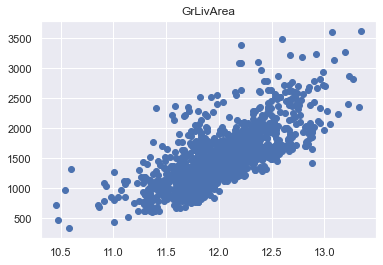

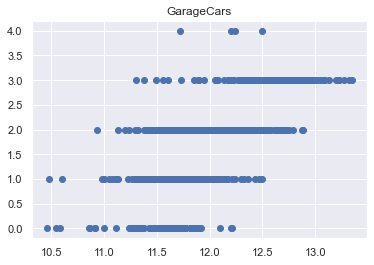

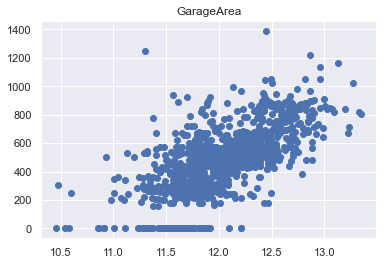

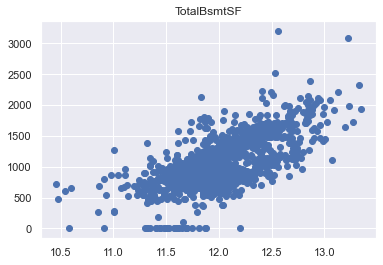

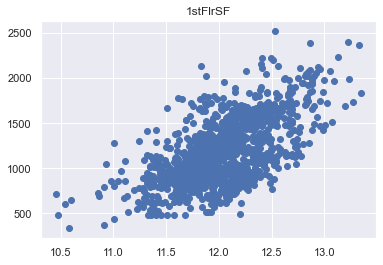

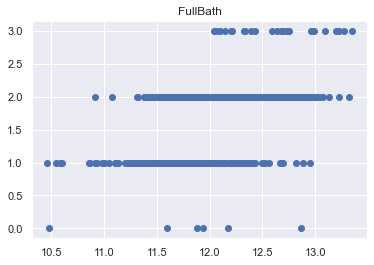

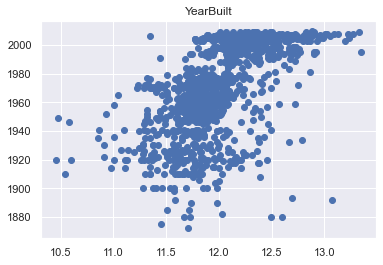

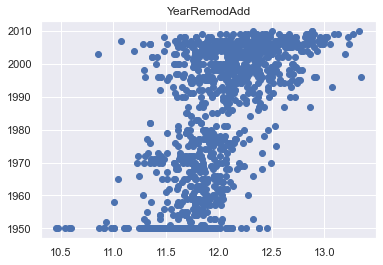

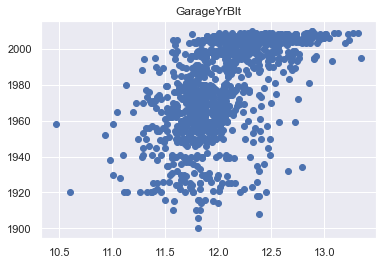

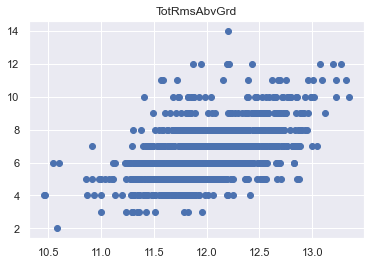

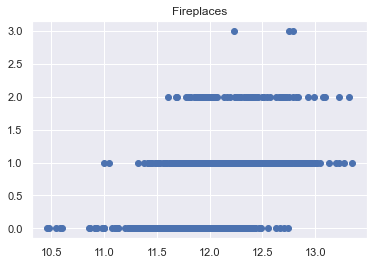

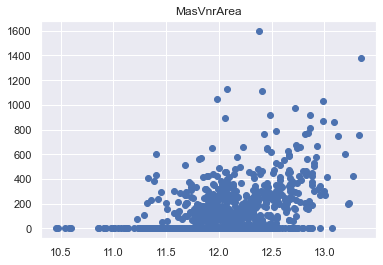

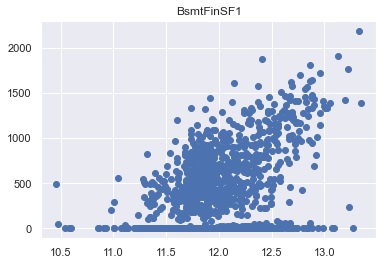

In [113]:
for x in y[1:15]:
    fig, ax = plt.subplots()
    ax.scatter(data.SalePrice, data[x])
    plt.title(x)
    plt.show()

Графики стали намного однороднее. 

## Пропущенные значения.

Посмотрим на процент пропущенных значений в каждом столбце.

In [114]:
countMV = data.isna().sum()
percentMV = data.isna().sum()/data.shape[0]
missingvalues=pd.concat([countMV,percentMV], axis=1, keys=['Total', 'Percent'])
missingvalues = missingvalues.sort_values(by = 'Percent', ascending=False)

In [115]:
list(data.dtypes[data.dtypes != 'object'].index).remove('SalePrice')

In [116]:
missingvalues.shape

(81, 2)

<AxesSubplot:ylabel='Percent'>

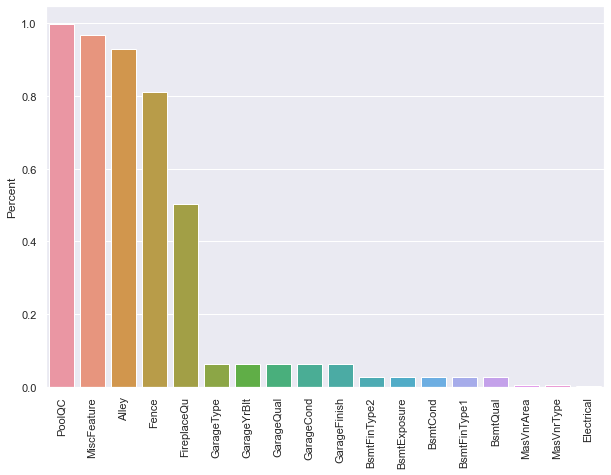

In [117]:
sns.set()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.barplot(x=missingvalues.index[missingvalues.Percent > 0], y = missingvalues.Percent[missingvalues.Percent > 0])

Переменная PoolQC имеет такой огромный процент пропущенных значений, потому что для всех домов, в которых нет бассейна, в графе "качество бассейна" стоит None. MiscFeature - Прочие функции, не относящиеся к другим категориям. В случае пропущенного значения - таких функций просто нет. Alley. None - у дома нет доступа к переулку. Fence - качество изгороди. None - отсутствие таковой. И так далее. Поэтому заменим пропущенные значения численных переменных нулями, а номинативных строкой "None" 

In [118]:
data.loc[:, "Alley"] = data.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
data.loc[:, "BedroomAbvGr"] =data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
data.loc[:, "BsmtQual"] = data.loc[:, "BsmtQual"].fillna("No")
data.loc[:, "BsmtCond"] = data.loc[:, "BsmtCond"].fillna("No")
data.loc[:, "BsmtExposure"] = data.loc[:, "BsmtExposure"].fillna("No")
data.loc[:, "BsmtFinType1"] = data.loc[:, "BsmtFinType1"].fillna("No")
data.loc[:, "BsmtFinType2"] = data.loc[:, "BsmtFinType2"].fillna("No")
data.loc[:, "BsmtFullBath"] = data.loc[:, "BsmtFullBath"].fillna(0)
data.loc[:, "BsmtHalfBath"] = data.loc[:, "BsmtHalfBath"].fillna(0)
data.loc[:, "BsmtUnfSF"] = data.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
data.loc[:, "CentralAir"] = data.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
data.loc[:, "Condition1"] = data.loc[:, "Condition1"].fillna("Norm")
data.loc[:, "Condition2"] = data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
data.loc[:, "EnclosedPorch"] = data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
data.loc[:, "ExterCond"] = data.loc[:, "ExterCond"].fillna("TA")
data.loc[:, "ExterQual"] = data.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
data.loc[:, "Fence"] = data.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
data.loc[:, "FireplaceQu"] = data.loc[:, "FireplaceQu"].fillna("No")
data.loc[:, "Fireplaces"] = data.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
data.loc[:, "Functional"] = data.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
data.loc[:, "GarageType"] =data.loc[:, "GarageType"].fillna("No")
data.loc[:, "GarageFinish"] =data.loc[:, "GarageFinish"].fillna("No")
data.loc[:, "GarageQual"] = data.loc[:, "GarageQual"].fillna("No")
data.loc[:, "GarageCond"] = data.loc[:, "GarageCond"].fillna("No")
data.loc[:, "GarageArea"] = data.loc[:, "GarageArea"].fillna(0)
data.loc[:, "GarageCars"] = data.loc[:, "GarageCars"].fillna(0)
data.loc[:, "GarageYrBlt"] = data.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
data.loc[:, "HalfBath"] = data.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
data.loc[:, "HeatingQC"] = data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
data.loc[:, "KitchenAbvGr"] = data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
data.loc[:, "KitchenQual"] = data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
data.loc[:, "LotFrontage"] = data.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
data.loc[:, "LotShape"] = data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
data.loc[:, "MasVnrType"] = data.loc[:, "MasVnrType"].fillna("None")
data.loc[:, "MasVnrArea"] = data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
data.loc[:, "MiscFeature"] = data.loc[:, "MiscFeature"].fillna("No")
data.loc[:, "MiscVal"] = data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
data.loc[:, "OpenPorchSF"] = data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
data.loc[:, "PavedDrive"] = data.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
data.loc[:, "PoolQC"] = data.loc[:, "PoolQC"].fillna("No")
data.loc[:, "PoolArea"] = data.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
data.loc[:, "SaleCondition"] = data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
data.loc[:, "ScreenPorch"] = data.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
data.loc[:, "TotRmsAbvGrd"] = data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
data.loc[:, "Utilities"] = data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
data.loc[:, "WoodDeckSF"] = data.loc[:, "WoodDeckSF"].fillna(0)
data.loc[:, "Electrical"] = data.loc[:, "Electrical"].fillna(data.Electrical.mode()[0])

Проверка

In [119]:
data.isna().sum().max()

0

## Номинативные переменные 

In [120]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data[categorialdata] = data[categorialdata].apply(lambda x: lbl.fit_transform(x))

In [121]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,0,0,2,2008,8,4,12.247699
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,0,0,5,2007,8,4,12.109016
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,0,0,9,2008,8,4,12.317171
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,0,0,2,2006,8,0,11.849405
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,0,0,12,2008,8,4,12.429220


## Создание новых переменных 

Создадим новые переменные с помощью умножения качества и площади того, что имеет дом. 

In [122]:
data["GarageGrade"] = data["GarageQual"] * data["GarageCond"]
data["ExterGrade"] = data["ExterQual"] * data["ExterCond"]
data["KitchenScore"] = data["KitchenAbvGr"] * data["KitchenQual"]
data["FireplaceScore"] = data["Fireplaces"] * data["FireplaceQu"]
data["GarageScore"] = data["GarageArea"] * data["GarageQual"]
data["PoolScore"] = data["PoolArea"] * data["PoolQC"]

Создадим переменную, содержащую всю площадь дома  

In [123]:
data['TotalSF'] =data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [124]:
data.shape

(1195, 88)

In [125]:
newnumericaldata = list(numericaldata) + ["GarageGrade","ExterGrade", "KitchenScore", "FireplaceScore","GarageScore", "PoolScore" ,"TotalSF"]

Теперь посмотрим на "самые важные" для SalePrice переменные и создадим новые переменные, возведя их во вторую и третью степень, а также взяв из них корень.

<AxesSubplot:>

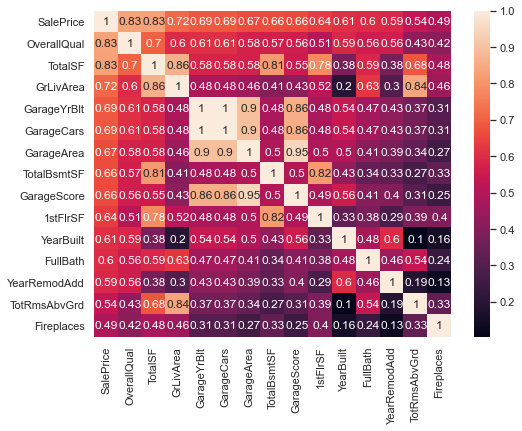

In [126]:
f, ax = plt.subplots(figsize=(8, 6)) 
y = data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
sns.heatmap(data[y].corr(), annot=True)

In [127]:
for x in y[1:]:
    data[x + "-2"] = data[x]**2
    data[x + "-3"] = data[x]**3
    data[x + "-1/2"] = data[x]**(1/2)
    if x in numericaldata:
        newnumericaldata.append(x + "-2")
        newnumericaldata.append(x + "-3")
        newnumericaldata.append(x + "-1/2")
data.shape

(1195, 130)

In [128]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FullBath-1/2,YearRemodAdd-2,YearRemodAdd-3,YearRemodAdd-1/2,TotRmsAbvGrd-2,TotRmsAbvGrd-3,TotRmsAbvGrd-1/2,Fireplaces-2,Fireplaces-3,Fireplaces-1/2
0,1,60,3,65.0,8450,1,1,3,3,0,...,1.414214,4012009,8036054027,44.754888,64,512,2.828427,0,0,0.0
1,2,20,3,80.0,9600,1,1,3,3,0,...,1.414214,3904576,7715442176,44.452222,36,216,2.449490,1,1,1.0
2,3,60,3,68.0,11250,1,1,0,3,0,...,1.414214,4008004,8024024008,44.743715,36,216,2.449490,1,1,1.0
3,4,70,3,60.0,9550,1,1,0,3,0,...,1.000000,3880900,7645373000,44.384682,49,343,2.645751,1,1,1.0
4,5,60,3,84.0,14260,1,1,0,3,0,...,1.414214,4000000,8000000000,44.721360,81,729,3.000000,1,1,1.0


## Распределение переменных

Проверим наши переменные на нормальность. 

In [129]:
skewness = data[newnumericaldata].skew()
mostskewed = pd.DataFrame(skewness, index=newnumericaldata, columns=['skewcoeff']).sort_values(by = 'skewcoeff' , ascending= False)

In [130]:
mostskewed.head(20)

,skewcoeff
PoolScore,23.397102
PoolArea,17.468830
3SsnPorch,11.214828
MiscVal,11.117708
LowQualFinSF,8.356150
Fireplaces-3,5.381705
TotalBsmtSF-3,5.206194
BsmtFinSF2,4.500651
BsmtHalfBath,4.365293
KitchenAbvGr,4.231686


In [131]:
mostskewed.tail(10)

,skewcoeff
YearBuilt-2,-0.539191
YearBuilt,-0.564550
YearBuilt-1/2,-0.577417
FullBath-1/2,-0.661722
ExterGrade,-1.181131
TotalBsmtSF-1/2,-1.511649
GarageArea-1/2,-1.558344
GarageYrBlt-1/2,-1.740518
GarageCars-1/2,-1.740518
GarageGrade,-2.413399


Одним из условий применения линейной регрессии является нормальность распределения данных. В некоторых переменных есть заметная ассиметричность и вытянутость графика. Применем к таким переменным разного вида трагсформации и выберем наилучшую. 

In [132]:
loglist = []
for x in (mostskewed[(mostskewed.skewcoeff > 0.5) | (mostskewed.skewcoeff < -0.5)].index):
    normalskew = data[x].skew()
    newskew = np.log1p(data[x]).skew()
    if abs(newskew) < abs(normalskew):
        print(f'without {normalskew}')
        data[x] = np.log1p(data[x])
        print(f'Применена лог-трансформация для {x}, skewcoeff = {newskew}')
        loglist.append(x)
    else:
        print('данные не были изменены, лог-трансформацию увеличивала ассиметричность и вытянутость')

without 23.397101716138874
Применена лог-трансформация для PoolScore, skewcoeff = 19.986915118497784
without 17.468830234115455
Применена лог-трансформация для PoolArea, skewcoeff = 17.224948563273312
without 11.214827967814125
Применена лог-трансформация для 3SsnPorch, skewcoeff = 8.13227016538109
without 11.11770796641819
Применена лог-трансформация для MiscVal, skewcoeff = 5.5323135197956885
without 8.356150053931625
Применена лог-трансформация для LowQualFinSF, skewcoeff = 6.975336881859903
without 5.381705230855548
Применена лог-трансформация для Fireplaces-3, skewcoeff = 1.8169282606031627
without 5.20619352138647
Применена лог-трансформация для TotalBsmtSF-3, skewcoeff = -5.115747887497035
without 4.5006508361676705
Применена лог-трансформация для BsmtFinSF2, skewcoeff = 2.664785076648781
without 4.365293206863157
Применена лог-трансформация для BsmtHalfBath, skewcoeff = 4.144015512972544
without 4.231686090642119
Применена лог-трансформация для KitchenAbvGr, skewcoeff = 3.59157

## Стандартизация данных 

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[newnumericaldata] = scaler.fit_transform(data[newnumericaldata])

In [134]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FullBath-1/2,YearRemodAdd-2,YearRemodAdd-3,YearRemodAdd-1/2,TotRmsAbvGrd-2,TotRmsAbvGrd-3,TotRmsAbvGrd-1/2,Fireplaces-2,Fireplaces-3,Fireplaces-1/2
0,-1.722847,0.419452,3,-0.202508,-0.063153,1,1,3,3,0,...,0.797206,0.843628,0.844420,0.842408,0.954990,0.953450,0.945834,-0.870277,-0.765486,-0.977484
1,-1.720473,-1.120859,3,0.484334,0.202455,1,1,3,3,0,...,0.797206,-0.436391,-0.441939,-0.428033,-0.220906,-0.215730,-0.271425,0.613057,0.423796,0.881761
2,-1.718098,0.419452,3,-0.065140,0.532616,1,1,0,3,0,...,0.797206,0.795910,0.796153,0.795508,-0.220906,-0.215730,-0.271425,0.613057,0.423796,0.881761
3,-1.715724,0.638731,3,-0.431456,0.191585,1,1,0,3,0,...,-0.975072,-0.718481,-0.723070,-0.711530,0.407466,0.410381,0.359025,0.613057,0.423796,0.881761
4,-1.713349,0.419452,3,0.667492,1.026164,1,1,0,3,0,...,0.797206,0.700546,0.699764,0.701672,1.439840,1.432832,1.496977,0.613057,0.423796,0.881761


## Препроцесс-функция 

In [135]:
testdata = pd.read_csv('test.csv')

Создадим функцию, которой преобразуем тестовые и будущие данные к тому виду, к которому были приведены тренировочные. 

In [136]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [137]:
def preprocess (newdata):
    #устраняем пропущенные значения
    newdata[numericaldata]=newdata[numericaldata].fillna(0)
    newdata[categorialdata]= newdata[categorialdata].fillna('None')
    #преобразуем номинативные данные
    newdata[categorialdata] = newdata[categorialdata].apply(lambda x: lbl.fit_transform(x))
    #создадим новых переменных "веса" частей дома 
    newdata["GarageGrade"] = newdata["GarageQual"] * newdata["GarageCond"]
    newdata["ExterGrade"] = newdata["ExterQual"] * newdata["ExterCond"]
    newdata["KitchenScore"] = newdata["KitchenAbvGr"] * newdata["KitchenQual"]
    newdata["FireplaceScore"] = newdata["Fireplaces"] * newdata["FireplaceQu"]
    newdata["GarageScore"] = newdata["GarageArea"] * newdata["GarageQual"]
    newdata["PoolScore"] = newdata["PoolArea"] * newdata["PoolQC"]
    #создадим переменную общей площади дома 
    newdata['TotalSF'] =newdata['TotalBsmtSF'] + newdata['1stFlrSF'] + newdata['2ndFlrSF']
    #создадим новые переменные, которые являются полиномами самых "важных" переменных для SalePrice
    for x in y[1:]:
        newdata[x + "-2"] = newdata[x]**2
        newdata[x + "-3"] = newdata[x]**3
        newdata[x + "-1/2"] = newdata[x]**(1/2)
    for x in loglist:
        newdata[x] = np.log1p(newdata[x])
    newdata[newnumericaldata] = scaler.fit_transform(newdata[newnumericaldata])
    return newdata

In [138]:
testdata = preprocess(testdata)

Проверка на правильность работы функции. 

In [139]:
list(set(testdata.columns) - set(data.columns)) 

[]

In [140]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FullBath-1/2,YearRemodAdd-2,YearRemodAdd-3,YearRemodAdd-1/2,TotRmsAbvGrd-2,TotRmsAbvGrd-3,TotRmsAbvGrd-1/2,Fireplaces-2,Fireplaces-3,Fireplaces-1/2
0,-1.722847,0.419452,3,-0.202508,-0.063153,1,1,3,3,0,...,0.797206,0.843628,0.844420,0.842408,0.954990,0.953450,0.945834,-0.870277,-0.765486,-0.977484
1,-1.720473,-1.120859,3,0.484334,0.202455,1,1,3,3,0,...,0.797206,-0.436391,-0.441939,-0.428033,-0.220906,-0.215730,-0.271425,0.613057,0.423796,0.881761
2,-1.718098,0.419452,3,-0.065140,0.532616,1,1,0,3,0,...,0.797206,0.795910,0.796153,0.795508,-0.220906,-0.215730,-0.271425,0.613057,0.423796,0.881761
3,-1.715724,0.638731,3,-0.431456,0.191585,1,1,0,3,0,...,-0.975072,-0.718481,-0.723070,-0.711530,0.407466,0.410381,0.359025,0.613057,0.423796,0.881761
4,-1.713349,0.419452,3,0.667492,1.026164,1,1,0,3,0,...,0.797206,0.700546,0.699764,0.701672,1.439840,1.432832,1.496977,0.613057,0.423796,0.881761


In [141]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,FullBath-1/2,YearRemodAdd-2,YearRemodAdd-3,YearRemodAdd-1/2,TotRmsAbvGrd-2,TotRmsAbvGrd-3,TotRmsAbvGrd-1/2,Fireplaces-2,Fireplaces-3,Fireplaces-1/2
0,-1.730864,-1.116585,3,0.684849,0.561787,1,1,3,3,0,...,-1.022833,-1.074359,-1.075793,-1.072133,-0.943229,-0.941659,-0.937467,-0.858078,-0.750005,-0.977373
1,-1.728490,-1.116585,4,0.715852,0.970407,1,1,0,3,0,...,-1.022833,-1.214951,-1.214958,-1.214874,-0.159169,-0.154543,-0.206946,-0.858078,-0.750005,-0.977373
2,-1.726115,0.414449,4,0.498831,0.908413,1,1,0,3,0,...,0.798836,0.677307,0.675844,0.679449,-0.159169,-0.154543,-0.206946,0.558941,0.363699,0.856764
3,-1.723741,0.414449,4,0.622843,0.257857,1,1,0,3,0,...,0.798836,0.677307,0.675844,0.679449,0.509964,0.512581,0.464838,0.558941,0.363699,0.856764
4,-1.721367,1.397832,4,-0.462261,-1.116969,1,1,0,1,0,...,0.798836,0.391029,0.387337,0.396517,-0.943229,-0.941659,-0.937467,-0.858078,-0.750005,-0.977373


## Предсказание 

### Обычная линейная регрессия

В этом ноутбуке будет использовано 4 модели линейной регрессии и их сравнительный анализ. 
Начнем с обычной линейной регрессии 

In [142]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
X = data.drop(['SalePrice'], 1)
y = data.SalePrice

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [145]:
model = LinearRegression()
cv = KFold(n_splits=10, random_state=20, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [146]:
print(f'R2 = {np.mean(scores)}, std = {np.std(scores)}')

R2 = 0.8880147790049635, std = 0.036717719051676825


In [147]:
scores

array([0.87623047, 0.92578807, 0.907307  , 0.79826965, 0.89697389,
       0.89241919, 0.9328559 , 0.87138346, 0.91289798, 0.86602218])

In [148]:
model.fit(X_train, y_train)
testprediction = model.predict(X_test)

In [149]:
from sklearn.metrics import r2_score

In [150]:
trainprediction = model.predict(X_train)

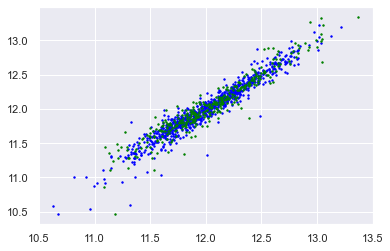

In [179]:
fig, ax = plt.subplots()
ax.scatter(trainprediction, y_train, c = "blue", s = 2)
ax.scatter(testprediction,y_test, c = "green", s = 2)

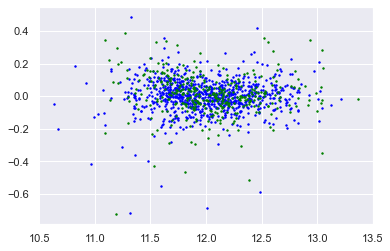

In [180]:
fig, ax = plt.subplots()
ax.scatter(trainprediction, y_train - trainprediction, c = "blue", s = 2)
ax.scatter(testprediction,y_test - testprediction, c = "green", s = 2)

### Ridge регрессия 

Ridge регрессия отличается тем, что кроме обычного интерсепта добавляется квадраты всех коэффициентов около зависимых переменных, помноженные на альфа .Таким образом, линейная регрессия становится менее чувствительной к переменным. Чем больше альфа, тем меньше линейная регрессия отклоняется от линии среднего значения. Такая регрессия коррелирующим переменным определяет почти равные друг другу коэффициенты. 

In [241]:
ridge = RidgeCV().fit(X_train, y_train)
alpha = ridge.alpha_
print(ridge.score(X_train, y_train))
print(alpha)

-193821697896858.88
10.0


Теперь проверим значения вокруг полученной альфа для более точного результата. 

In [191]:
ridge = RidgeCV(alphas = np.arange(7, 20))
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 19


In [192]:
ridge = RidgeCV(alphas = np.arange(14.0, 16.0, 0.1))
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 15.899999999999993


In [193]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 84, normalize = True)
ridge.fit(X_train, y_train) 

Ridge(alpha=84, normalize=True)

In [194]:
trainprediction2 = ridge.predict(X_train)
r2_score(trainprediction2,y_train)

-8.012592184557624

## Lasso 

Lasso регрессия имеет кроме обычного интерсепта модули всех коэффициентов около зависимых переменных, помноженные на альфа .Таким образом, линейная регрессия становится менее чувствительной к переменным, а значит, менее переобучена. Чем больше альфа, тем меньше линейная регрессия отклоняется от линии среднего значения. К тому же, в отличие от Ridge регрессии, избавлется от ненужных переменных, которые только мешают в предсказывании. В лассо один из коррелированных предикторов имеет больший коэффициент, в то время как остальные (почти) обнулены.

In [206]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 200000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Лучшая alpha :", alpha)

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30725719498193627, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5345911877778473, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4720842691275049, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisr

Best alpha : 0.003


Теперь проверим значения вокруг полученной альфа для более точного результата. 

In [202]:
lasso = LassoCV(alphas = np.arange(alpha - 1.0, alpha + 1.0, 0.1), max_iter = 100000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Лучшая alpha :", alpha)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

Try again for more precision with alphas centered around 0.00255


/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01875403340542725, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.731070186564745, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(


Best alpha : 0.00254999999999983


In [203]:
r2_score(y_train_las,y_train)

0.9149215201857375

In [204]:
r2_score(y_test_las,y_test)

0.913249711878877

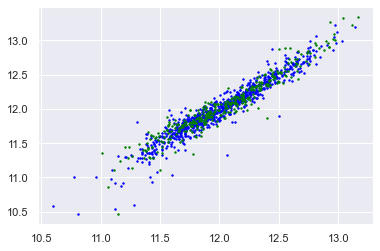

In [208]:
fig, ax = plt.subplots()
ax.scatter(y_train_las, y_train, c = "blue", s = 2)
ax.scatter(y_test_las,y_test, c = "green", s = 2)

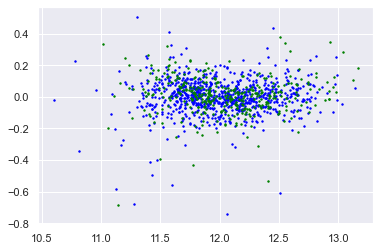

In [209]:
fig, ax = plt.subplots()
ax.scatter(y_train_las, y_train - y_train_las, c = "blue", s = 2)
ax.scatter(y_test_las,y_test - y_test_las, c = "green", s = 2)

In [235]:
print(f'Регрессия Lasso исключила {(lasso.coef_==0).sum()} переменных')

Регрессия Lasso исключила 72 переменных


Посмотрим на коэффициенты. 

In [215]:
coeff = pd.Series(lasso.coef_, index = X_train.columns)

<AxesSubplot:>

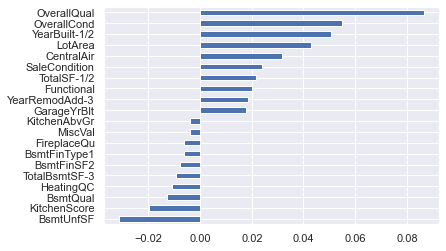

In [218]:
pd.concat([coeff.sort_values().head(10), coeff.sort_values().tail(10)]).plot(kind = "barh")

## elasticNet

In [221]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.041531540082967666, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.375932011689085, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.353063315405381, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisra

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.199549933861807, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3157542409376877, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8746350813236625, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9373664856183472, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.838098384339283, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.233433775511998, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilo

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.393489900357938, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.202316287740221, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.143695157027117, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.587675904266179, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.409321192420095, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.241653548985627, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9050709431504584, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.517995149514211, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.429243530053327, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.609261661596884, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.436667145090122, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.654425538021742, tolerance: 0.012342486084852168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.864160051065546, tolerance: 0.012592058219524223
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.642044687008875, tolerance: 0.012592058219524223
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.458869795852659, tolerance: 0.012592058219524223
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.927014658571245, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.91287349930259, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.678799092318169, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilov

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.66904402876267, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.621279681312072, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.449975120514929, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilo

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.431787775775306, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2176164903778, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.043361456684171, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilov

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.589660933401685, tolerance: 0.012342486084852168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.375911164488969, tolerance: 0.012342486084852168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.098252196389884, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18052706456079903, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4148101682986418, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.278905228517027, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafil

Best l1_ratio : 0.95
Best alpha : 0.003


/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.307475196342242, tolerance: 0.013746939783481085
  model = cd_fast.enet_coordinate_descent(


In [224]:
elasticNet = ElasticNetCV(l1_ratio = np.arange(0, ratio + 1.0, 0.1), alphas = np.arange(0, alpha + 1.0, 0.1), cv = 10)
elasticNet.fit(X_train, y_train)
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.53168766325361, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not conver

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.746879411172198, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.876247136721261, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.149179613296101, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8283119416234515, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2359279596944965, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.935416580981455, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.403694910748985, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.134627900617203, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.281589846986341, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0256340991594, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.530153331644772, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.526924086206684, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.00831415675284, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18385883317005636, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29880611530404977, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.628468693314165, tolerance: 0.01228165411247452
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafi

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.642837857630678, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.355662440104837, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03578073008297622, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.61176758847685, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.753298233058842, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilo

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.132637778621913, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.897402556025476, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.625652910535408, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafi

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3606695199619026, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.305027935270374, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.696065031997099, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.185719290877685, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.153554409115458, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not conve

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23535592349038126, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8870595287279883, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.138111259779393, tolerance: 0.01239641998320488
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.908959302504076, tolerance: 0.012542868654243816
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.308904914885247, tolerance: 0.012459447244987775
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not conve

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.15738092223728, tolerance: 0.012019914988090043
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.289393486701357, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.201696034832352, tolerance: 0.012342486084852168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not conve

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.33257407598667, tolerance: 0.012592058219524223
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not conver

/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.201696032728975, tolerance: 0.012342486084852168
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.190125578070763, tolerance: 0.012360995863941572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

Best l1_ratio : 0.95
Best alpha : 0.003


/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.289393468032358, tolerance: 0.012094316586425508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.888167533496528, tolerance: 0.012628539254957724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mariaisrafilova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

In [225]:
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

In [226]:
r2_score(y_train_ela,y_train)

0.9186465212688038

In [227]:
r2_score(y_test_ela,y_test)

0.9109448799515403

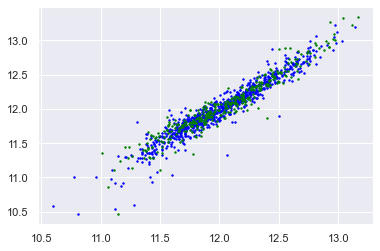

In [228]:
fig, ax = plt.subplots()
ax.scatter(y_train_las, y_train, c = "blue", s = 2)
ax.scatter(y_test_las,y_test, c = "green", s = 2)

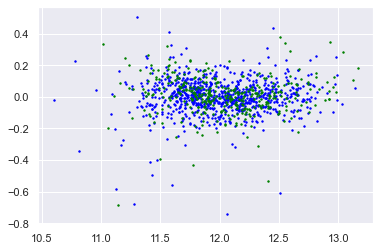

In [229]:
fig, ax = plt.subplots()
ax.scatter(y_train_las, y_train - y_train_las, c = "blue", s = 2)
ax.scatter(y_test_las,y_test - y_test_las, c = "green", s = 2)

In [234]:
print(f'Регрессия ElasticNet исключила {(elasticNet.coef_==0).sum()} переменных')

Регрессия ElasticNet исключила 1 переменных


<AxesSubplot:>

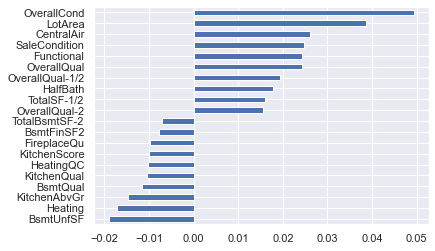

In [236]:
coeff = pd.Series(elasticNet.coef_, index = X_train.columns)
pd.concat([coeff.sort_values().head(10), coeff.sort_values().tail(10)]).plot(kind = "barh")